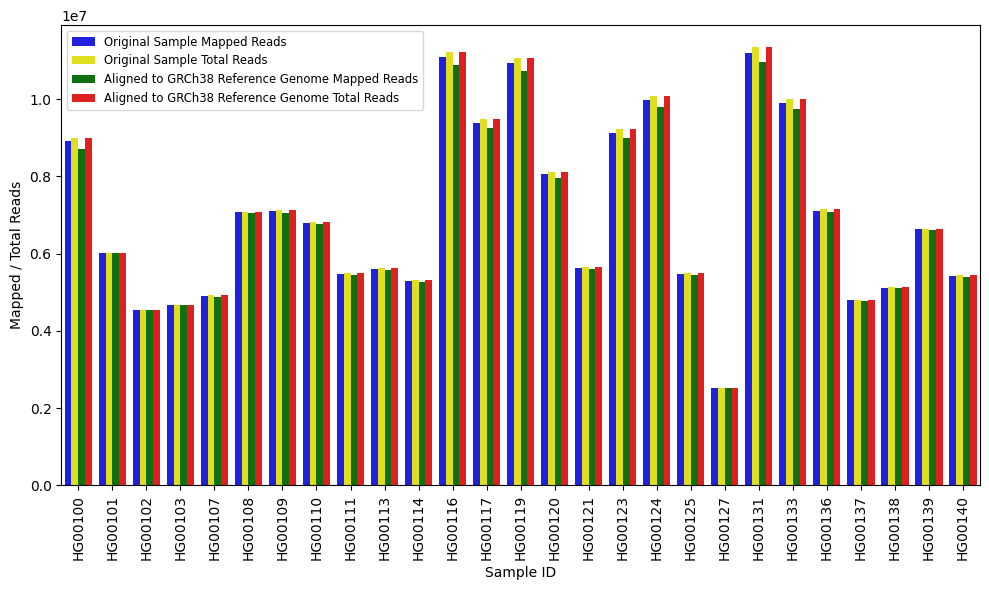

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/mapped_stats.csv')

df_melted = df.melt(id_vars='sample', var_name='Category', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sample', y='Value', hue='Category', data=df_melted, palette=['blue', 'yellow', 'green', 'red'])
ax.set_xlabel('Sample ID')  # Set the label for the x-axis
ax.set_ylabel('Mapped / Total Reads')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Customize the labels list to change the legend labels
custom_labels = ['Original Sample Mapped Reads', 'Original Sample Total Reads', 'Aligned to GRCh38 Reference Genome Mapped Reads', 'Aligned to GRCh38 Reference Genome Total Reads']

# Set the custom labels for the legend
ax.legend(handles=handles, labels=custom_labels, loc='upper left', fontsize='small')

plt.show()

<ipython-input-17-e1f59f8abef6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Duplication_Percentage', y='Sample', data=df, palette='viridis')


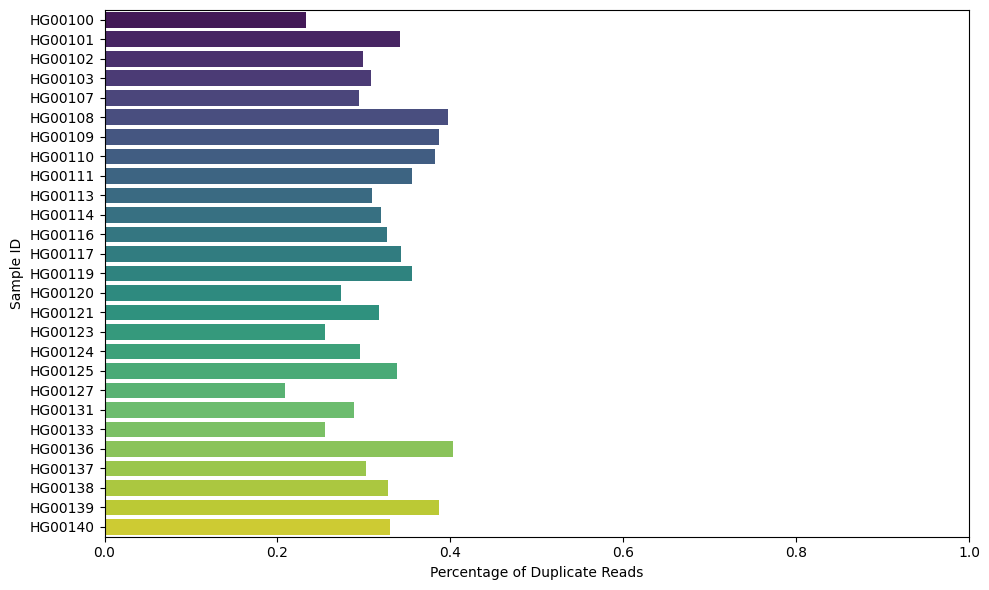

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/duplicate_percentage.csv')

# Remove the "aligned" prefix from the sample names
df['Sample'] = df['Sample'].str.replace('aligned', '')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Duplication_Percentage', y='Sample', data=df, palette='viridis')
ax.set_xlabel('Percentage of Duplicate Reads')  # Set the label for the x-axis
ax.set_ylabel('Sample ID')  # Set the label for the y-axis
ax.set_xlim(0, 1)  # Set the x-axis limit to 100%
plt.tight_layout()  # Adjust layout to prevent cutting off labels

plt.show()

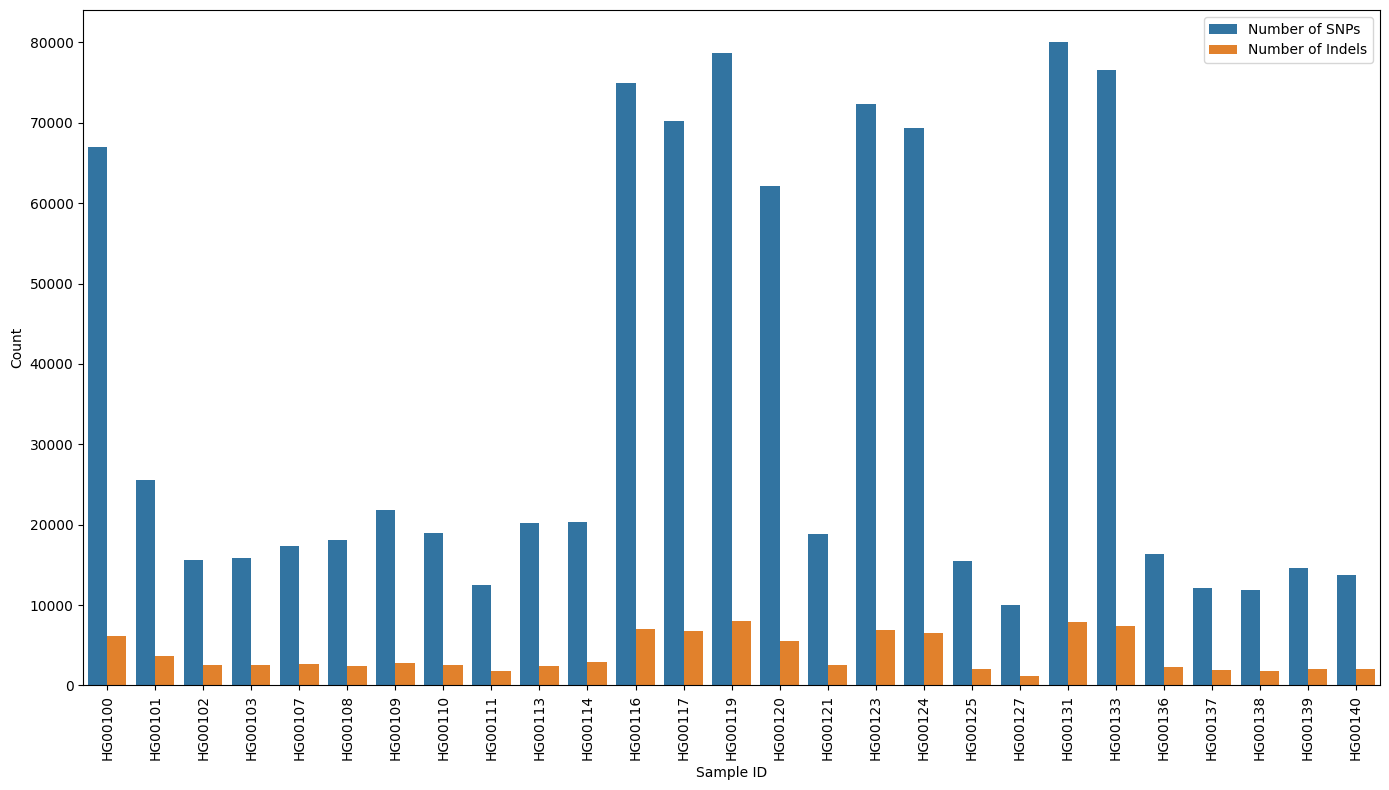

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/HC_stats.csv')

# Remove the "recalibrated_marked_dup_aligned" prefix from the sample names
df['Sample'] = df['Sample'].str.replace('recalibrated_marked_dup_aligned', '')

# Extract the relevant columns: 'Sample', 'number of SNPs', and 'number of indels'
extracted_df = df[['Sample', 'number of SNPs', 'number of indels']]

# Melt the dataframe to have 'number_of_snps' and 'number_of_indels' in the same column
df_melted = extracted_df.melt(id_vars='Sample', var_name='Category', value_name='Value')


# Plotting
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Sample', y='Value', hue='Category', data=df_melted)
ax.set_xlabel('Sample ID')  # Set the label for the x-axis
ax.set_ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Customize the legend
custom_labels = ['Number of SNPs', 'Number of Indels']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:2], labels=custom_labels)

plt.show()

<ipython-input-25-d46b1b012ac3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Count', data=data_t, palette='rainbow')


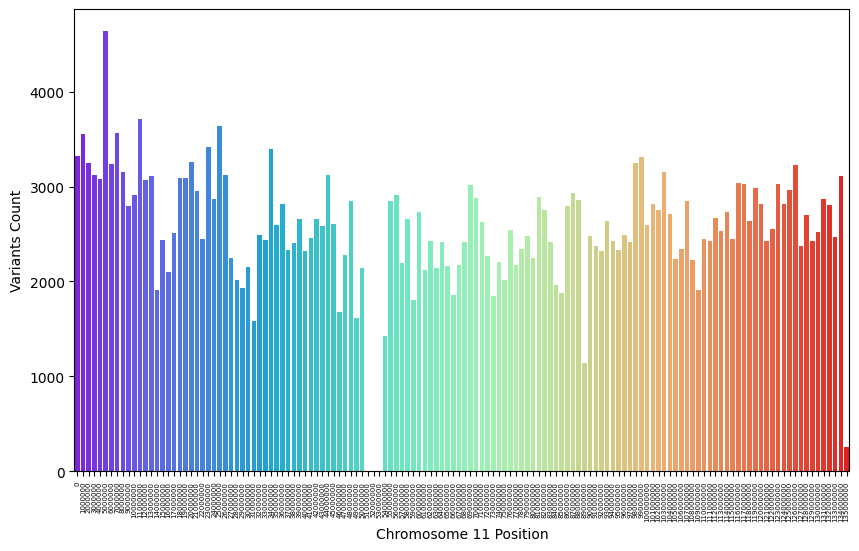

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/temp.csv')

# Transpose the dataframe and reset the index
data_t = data.transpose().reset_index()
data_t.columns = ['Position', 'Count']  # Rename the columns for clarity
data_t = data_t.iloc[1:]  # Remove the first row which is not needed for the plot

# Convert 'Position' and 'Count' to the correct types
data_t['Position'] = data_t['Position'].astype(int)
data_t['Count'] = data_t['Count'].astype(int)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Count', data=data_t, palette='rainbow')
plt.xticks(rotation=90, fontsize=5)  # Rotate and reduce font size of x-axis labels
plt.xlabel('Chromosome 11 Position')
plt.ylabel('Variants Count')
plt.show()

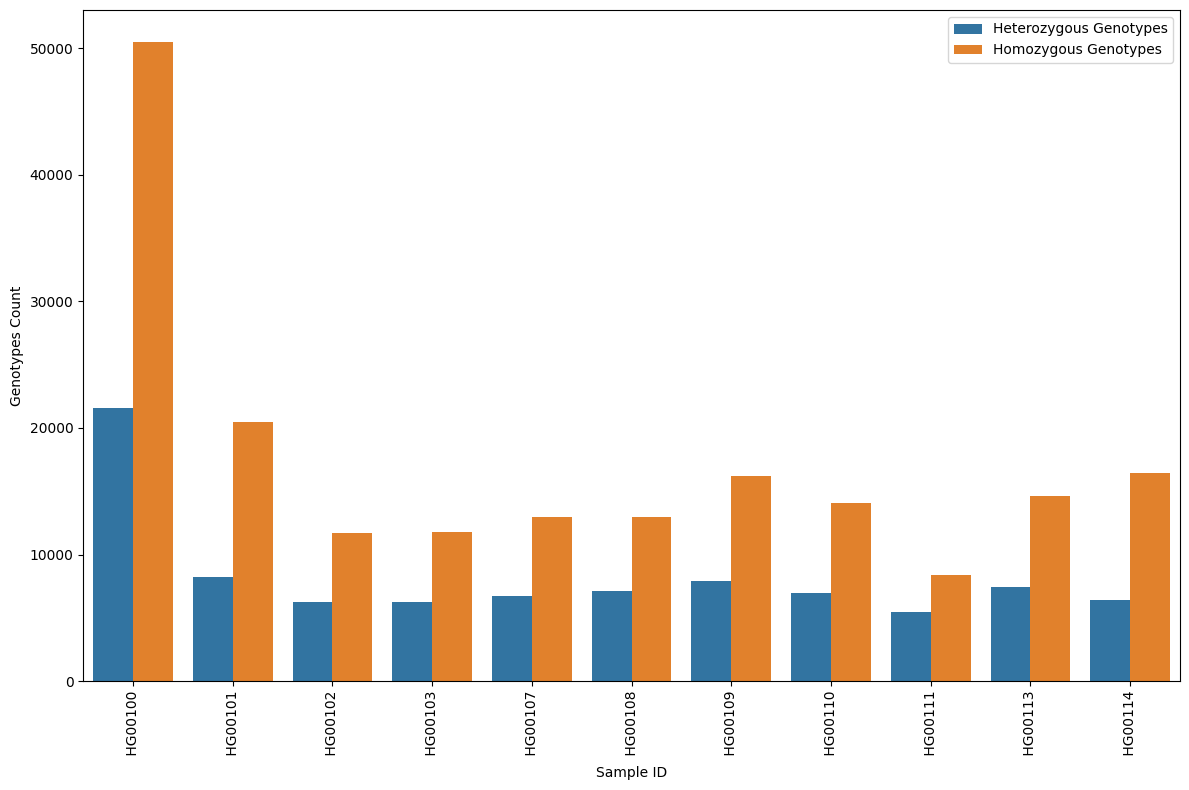

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/temp.csv')

# Correcting the column name for the first column
first_column_name = data.columns[0]

# Reshaping the data into a long format with the correct column name
data_long = data.melt(id_vars=[first_column_name], var_name='Sample_ID', value_name='Value')

# Removing the "recalibrated_marked_dup_aligned" part from the Sample IDs
data_long['Sample_ID'] = data_long['Sample_ID'].str.replace('recalibrated_marked_dup_aligned', '')

# Plotting with updated Sample IDs
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sample_ID', y='Value', hue=first_column_name, data=data_long)
ax.set_xlabel('Sample ID')  # Set the label for the x-axis
ax.set_ylabel('Genotypes Count')  # Set the label for the y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Customize the legend
custom_labels = ['Heterozygous Genotypes', 'Homozygous Genotypes']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:2], labels=custom_labels)

plt.show()